In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import logistic_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict

np.random.seed(44)  # for comparison of results

In [2]:
def process_df(name):
    df = pd.read_csv(f"data/{name}.csv")
    if len(df) > 12000:
        print(f"Downsampling {name} to 12000 samples form {len(df)} samples")
        df = df.sample(n=12000)
    df_y = df["target"]
    df_X = df.drop(columns=["target"])
    mean = df_X.mean()
    std = df_X.std()
    df_X = (df_X - mean) / std
    return df_X, df_y

In [3]:
def compare_convergence(
    X, y, algorithms=["iwls", "sgd", "adam"], k=10, test_size=0.2,
):
    final_metrics = pd.DataFrame(
        columns=[
            "Algorithm",
            "Balanced Accuracy",
        ]
    )
    after_epoch_metrics = defaultdict(list)

    for alg in algorithms:
        for i in range(k):

            # Split data and create regressor object
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size
            )
            model = logistic_regression.LogisticRegressor(
                descent_algorithm=alg
            )

            # Fit model
            model.fit(X_train, y_train, max_num_epoch=500, tolerance=1e-3)

            # Record metrics
            final_metrics.loc[len(final_metrics)] = [
                alg,
                model.balanced_accuracy(X_test, y_test),
            ]
            loss_after_epoch = model.convergence_rate
            after_epoch_metrics[alg].append(loss_after_epoch)

            print(f"Run {i+1} of {alg} completed")
    return after_epoch_metrics, final_metrics

In [4]:
def visualize_convergence(after_epoch, name, epoch_nums):
    after_epoch_processed = defaultdict(list)
    for alg_name, runs in after_epoch.items():
        for run in runs:
            zeros = np.zeros(501)
            for i in range(501):
                if i < len(run):
                    zeros[i] = run[i]
                else:
                    zeros[i] = run[-1]
            after_epoch_processed[alg_name].append(zeros)

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("husl", 3)
    counter = 0
    for alg_name, runs in after_epoch_processed.items():
        counter += 1
        runs = np.array(runs)
        plt.plot(runs.mean(axis=0)[:epoch_nums], label=alg_name, color=colors[counter - 1])
        plt.fill_between(
            range(epoch_nums),
            np.maximum(runs.mean(axis=0) - runs.std(axis=0), 0)[:epoch_nums],
            runs.mean(axis=0)[:epoch_nums] + runs.std(axis=0)[:epoch_nums],
            alpha=0.2,
            color=colors[counter - 1],
        )
    plt.legend()
    plt.title(
        f"Averaged convergence rate of different algorithms for {name} dataset",
        fontsize=15,
    )
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.savefig(f"plots/convergence/{name}.png")

In [5]:
def visualize_balanced_accuracy(metrisc_df, name):
    sns.boxplot(
        data=metrisc_df,
        x="Algorithm",
        y="Balanced Accuracy",
        palette=sns.color_palette("husl", 3),
    )
    plt.title(f"Balanced Accuracy for {name} dataset")
    plt.xlabel("Algorithm")
    plt.savefig(f"plots/accuracy/just_3/{name}_accuracy.png")

# aids

In [6]:
X, y = process_df("aids")
after_epoch, metric = compare_convergence(X, y, k=10)

Time run our at epoch 192.
Run 1 of iwls completed
Time run our at epoch 189.
Run 2 of iwls completed
Time run our at epoch 199.
Run 3 of iwls completed
Time run our at epoch 218.
Run 4 of iwls completed
Time run our at epoch 225.
Run 5 of iwls completed
Time run our at epoch 219.
Run 6 of iwls completed
Time run our at epoch 220.
Run 7 of iwls completed
Time run our at epoch 213.
Run 8 of iwls completed
Time run our at epoch 217.
Run 9 of iwls completed
Time run our at epoch 217.
Run 10 of iwls completed
Early stopping criterion reached at epoch 90.
Run 1 of sgd completed
Early stopping criterion reached at epoch 82.
Run 2 of sgd completed
Early stopping criterion reached at epoch 109.
Run 3 of sgd completed
Early stopping criterion reached at epoch 87.
Run 4 of sgd completed
Early stopping criterion reached at epoch 85.
Run 5 of sgd completed
Early stopping criterion reached at epoch 83.
Run 6 of sgd completed
Early stopping criterion reached at epoch 103.
Run 7 of sgd completed
Earl

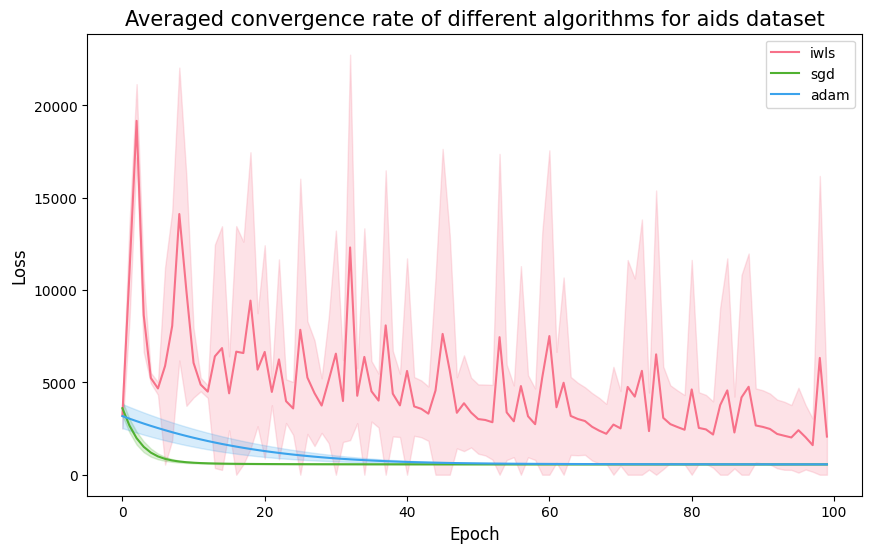

In [7]:
visualize_convergence(after_epoch, "aids", 100)

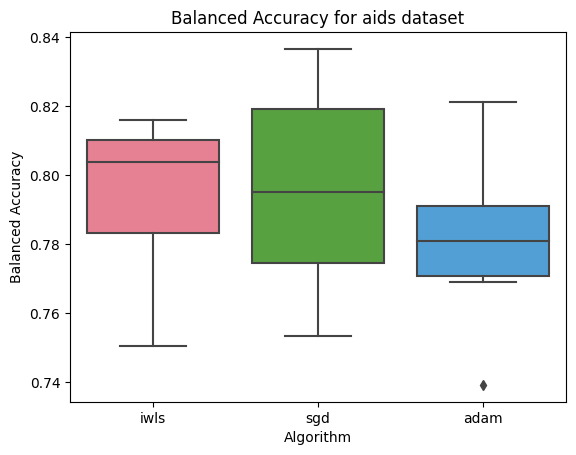

In [8]:
visualize_balanced_accuracy(metric, "aids")

# blood

In [9]:
X, y = process_df("blood")
after_epoch, metric = compare_convergence(X, y, k=10)

Run 1 of iwls completed
Run 2 of iwls completed
Run 3 of iwls completed
Run 4 of iwls completed
Run 5 of iwls completed
Run 6 of iwls completed
Run 7 of iwls completed
Run 8 of iwls completed
Run 9 of iwls completed
Run 10 of iwls completed
Early stopping criterion reached at epoch 133.
Run 1 of sgd completed
Early stopping criterion reached at epoch 209.
Run 2 of sgd completed
Early stopping criterion reached at epoch 181.
Run 3 of sgd completed
Early stopping criterion reached at epoch 180.
Run 4 of sgd completed
Early stopping criterion reached at epoch 149.
Run 5 of sgd completed
Early stopping criterion reached at epoch 155.
Run 6 of sgd completed
Early stopping criterion reached at epoch 169.
Run 7 of sgd completed
Early stopping criterion reached at epoch 95.
Run 8 of sgd completed
Early stopping criterion reached at epoch 153.
Run 9 of sgd completed
Early stopping criterion reached at epoch 165.
Run 10 of sgd completed
Run 1 of adam completed
Run 2 of adam completed
Run 3 of ad

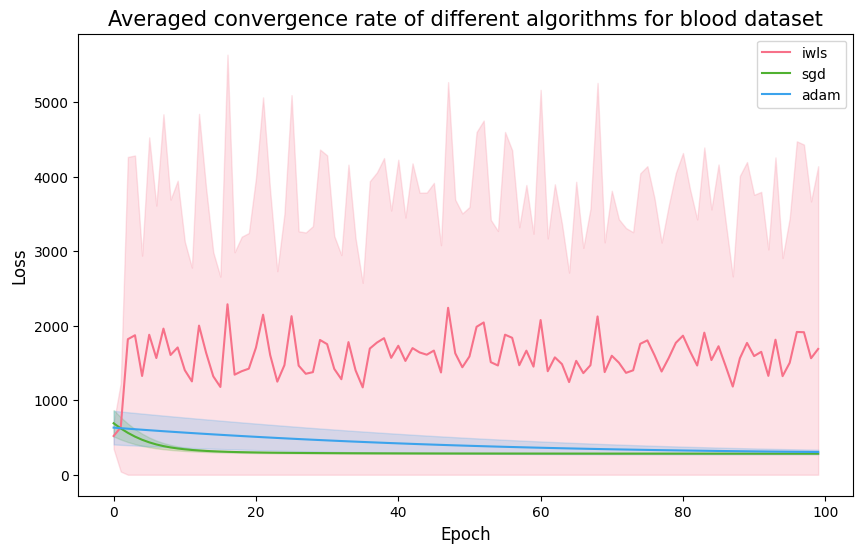

In [10]:
visualize_convergence(after_epoch, "blood", 100)

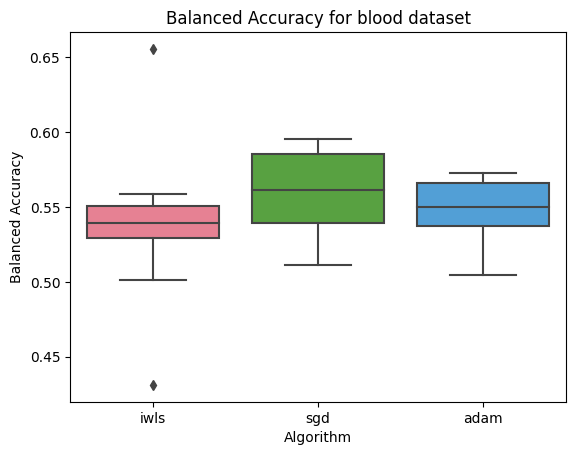

In [11]:
visualize_balanced_accuracy(metric, "blood")

# campaign 

In [12]:
X, y = process_df("campaign")
after_epoch, metric = compare_convergence(X, y, k=10)

Time run our at epoch 206.
Run 1 of iwls completed
Time run our at epoch 176.
Run 2 of iwls completed
Time run our at epoch 198.
Run 3 of iwls completed
Time run our at epoch 197.
Run 4 of iwls completed
Time run our at epoch 198.
Run 5 of iwls completed
Time run our at epoch 200.
Run 6 of iwls completed
Time run our at epoch 195.
Run 7 of iwls completed
Time run our at epoch 189.
Run 8 of iwls completed
Time run our at epoch 184.
Run 9 of iwls completed
Time run our at epoch 186.
Run 10 of iwls completed
Early stopping criterion reached at epoch 82.
Run 1 of sgd completed
Early stopping criterion reached at epoch 111.
Run 2 of sgd completed
Early stopping criterion reached at epoch 93.
Run 3 of sgd completed
Early stopping criterion reached at epoch 160.
Run 4 of sgd completed
Early stopping criterion reached at epoch 125.
Run 5 of sgd completed
Early stopping criterion reached at epoch 128.
Run 6 of sgd completed
Early stopping criterion reached at epoch 83.
Run 7 of sgd completed
Ea

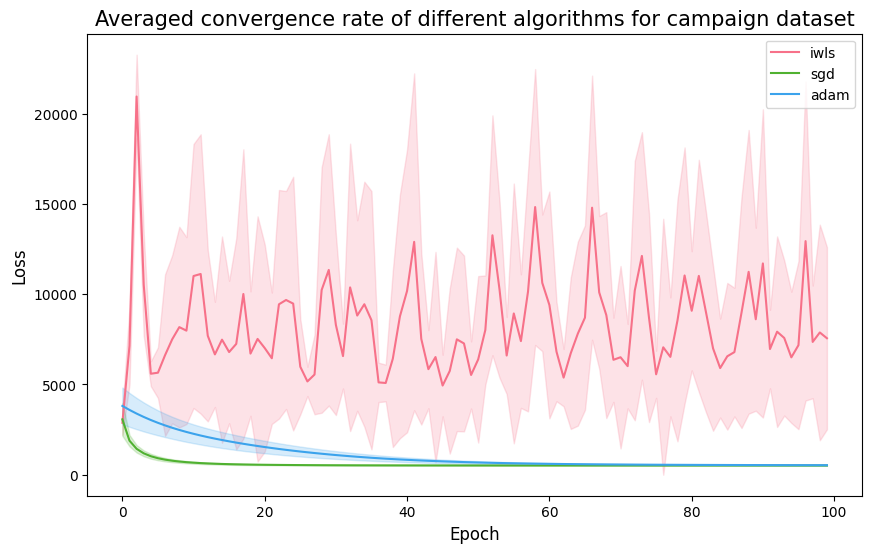

In [13]:
visualize_convergence(after_epoch, "campaign", 100)

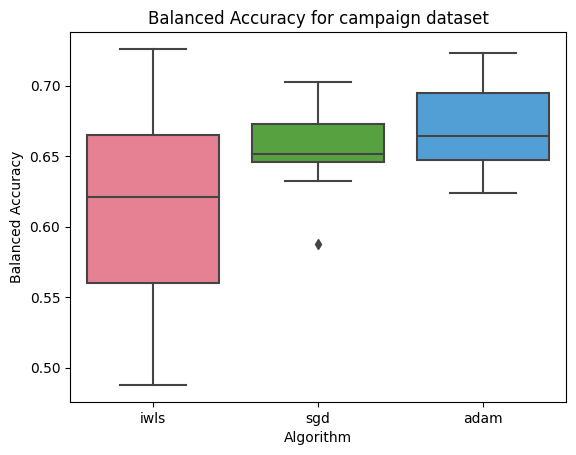

In [14]:
visualize_balanced_accuracy(metric, "campaign")

# communities and crime  

In [15]:
X, y = process_df("communities_and_crime")
after_epoch, metric = compare_convergence(X, y, k=10)

Time run our at epoch 228.
Run 1 of iwls completed
Time run our at epoch 235.
Run 2 of iwls completed
Time run our at epoch 239.
Run 3 of iwls completed
Time run our at epoch 229.
Run 4 of iwls completed
Time run our at epoch 241.
Run 5 of iwls completed
Time run our at epoch 244.
Run 6 of iwls completed
Time run our at epoch 240.
Run 7 of iwls completed
Time run our at epoch 243.
Run 8 of iwls completed
Time run our at epoch 243.
Run 9 of iwls completed
Time run our at epoch 243.
Run 10 of iwls completed
Early stopping criterion reached at epoch 419.
Run 1 of sgd completed
Run 2 of sgd completed
Early stopping criterion reached at epoch 476.
Run 3 of sgd completed
Early stopping criterion reached at epoch 357.
Run 4 of sgd completed
Early stopping criterion reached at epoch 484.
Run 5 of sgd completed
Early stopping criterion reached at epoch 440.
Run 6 of sgd completed
Early stopping criterion reached at epoch 370.
Run 7 of sgd completed
Early stopping criterion reached at epoch 263.

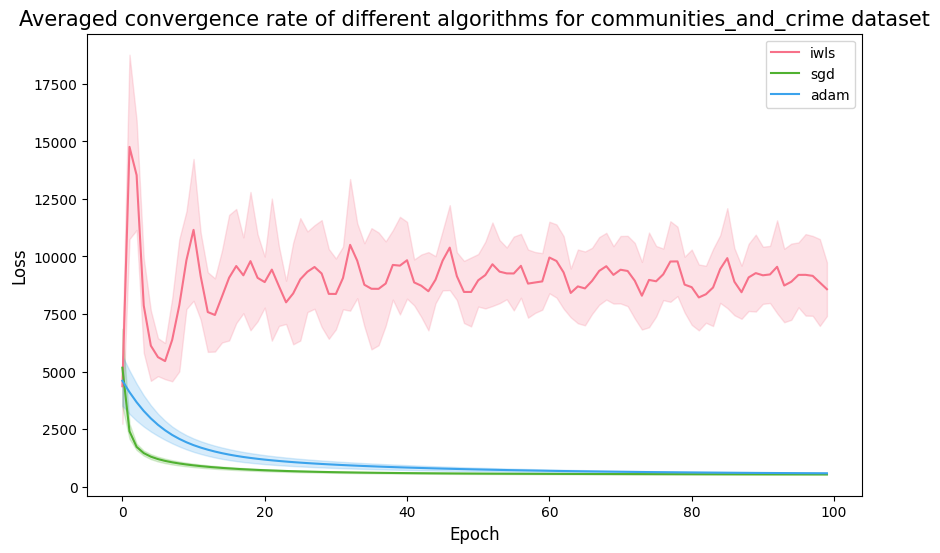

In [16]:
visualize_convergence(after_epoch, "communities_and_crime", 100)

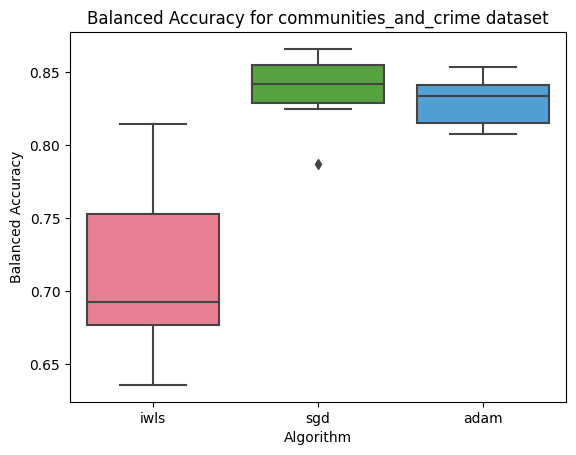

In [17]:
visualize_balanced_accuracy(metric, "communities_and_crime")

# diabetes

In [18]:
X, y = process_df("diabetes")
after_epoch, metric = compare_convergence(X, y, k=10)

Run 1 of iwls completed
Run 2 of iwls completed
Run 3 of iwls completed
Run 4 of iwls completed
Run 5 of iwls completed
Run 6 of iwls completed
Run 7 of iwls completed
Run 8 of iwls completed
Run 9 of iwls completed
Run 10 of iwls completed
Early stopping criterion reached at epoch 104.
Run 1 of sgd completed
Early stopping criterion reached at epoch 104.
Run 2 of sgd completed
Early stopping criterion reached at epoch 114.
Run 3 of sgd completed
Early stopping criterion reached at epoch 106.
Run 4 of sgd completed
Early stopping criterion reached at epoch 99.
Run 5 of sgd completed
Early stopping criterion reached at epoch 92.
Run 6 of sgd completed
Early stopping criterion reached at epoch 117.
Run 7 of sgd completed
Early stopping criterion reached at epoch 84.
Run 8 of sgd completed
Early stopping criterion reached at epoch 108.
Run 9 of sgd completed
Early stopping criterion reached at epoch 102.
Run 10 of sgd completed
Run 1 of adam completed
Run 2 of adam completed
Run 3 of adam

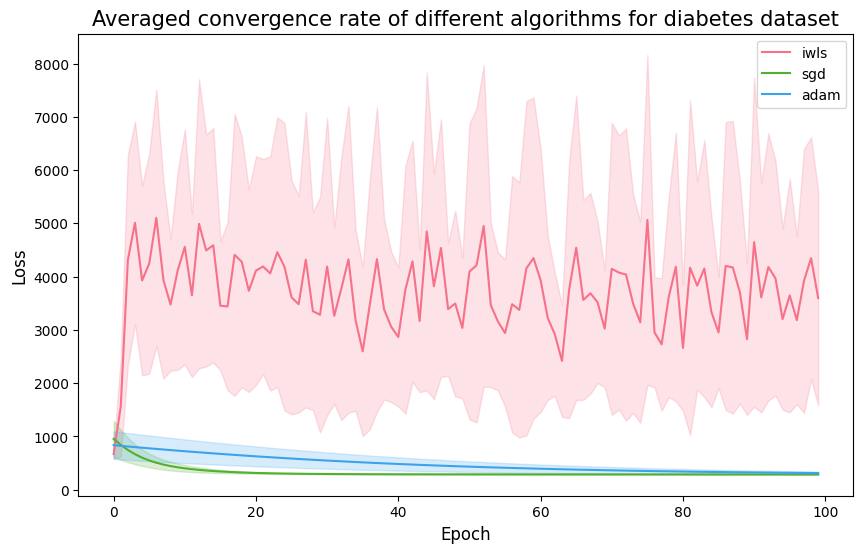

In [19]:
visualize_convergence(after_epoch, "diabetes", 100)

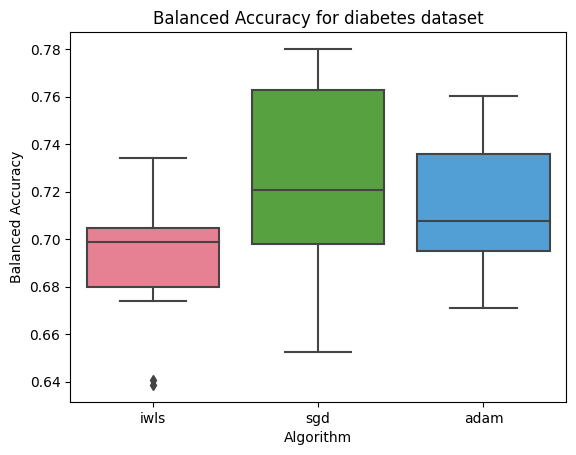

In [20]:
visualize_balanced_accuracy(metric, "diabetes")

# dry bean

In [21]:
X, y = process_df("dry_bean")
after_epoch, metric = compare_convergence(X, y, k=10)

Downsampling dry_bean to 12000 samples form 13611 samples
Time run our at epoch 1.
Run 1 of iwls completed
Time run our at epoch 1.
Run 2 of iwls completed
Time run our at epoch 1.
Run 3 of iwls completed
Time run our at epoch 1.
Run 4 of iwls completed
Time run our at epoch 1.
Run 5 of iwls completed
Time run our at epoch 1.
Run 6 of iwls completed
Time run our at epoch 1.
Run 7 of iwls completed
Time run our at epoch 1.
Run 8 of iwls completed
Time run our at epoch 1.
Run 9 of iwls completed
Time run our at epoch 1.
Run 10 of iwls completed
Early stopping criterion reached at epoch 77.
Run 1 of sgd completed
Early stopping criterion reached at epoch 70.
Run 2 of sgd completed
Early stopping criterion reached at epoch 72.
Run 3 of sgd completed
Early stopping criterion reached at epoch 72.
Run 4 of sgd completed
Early stopping criterion reached at epoch 78.
Run 5 of sgd completed
Early stopping criterion reached at epoch 85.
Run 6 of sgd completed
Early stopping criterion reached at e

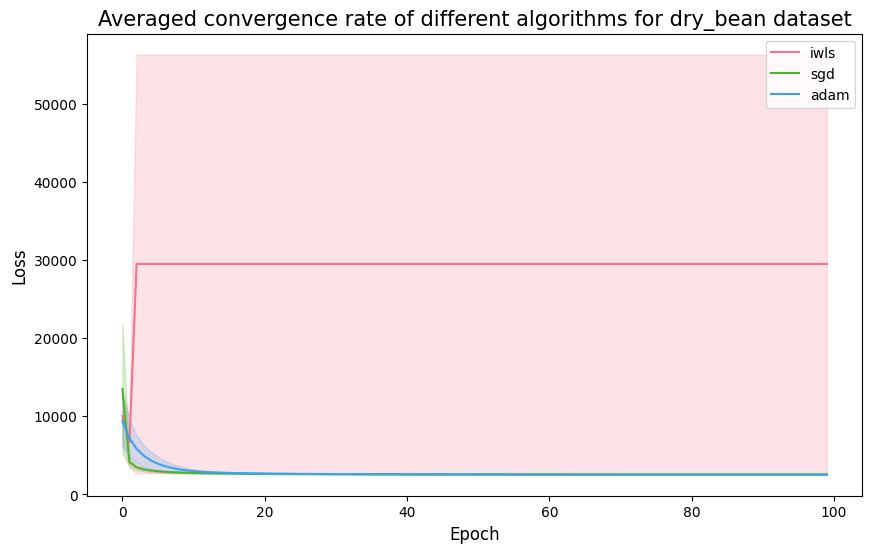

In [22]:
visualize_convergence(after_epoch, "dry_bean", 100)

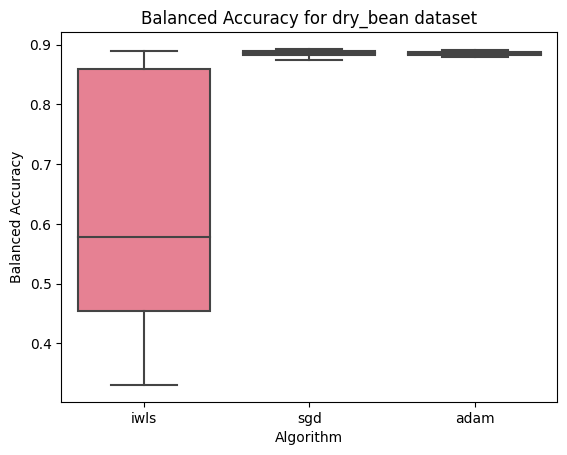

In [23]:
visualize_balanced_accuracy(metric, "dry_bean")

# heart

In [24]:
X, y = process_df("heart")
after_epoch, metric = compare_convergence(X, y, k=10)

Downsampling heart to 12000 samples form 253680 samples
Time run our at epoch 1.
Run 1 of iwls completed
Time run our at epoch 1.
Run 2 of iwls completed
Time run our at epoch 1.
Run 3 of iwls completed
Time run our at epoch 1.
Run 4 of iwls completed
Time run our at epoch 1.
Run 5 of iwls completed
Time run our at epoch 1.
Run 6 of iwls completed
Time run our at epoch 1.
Run 7 of iwls completed
Time run our at epoch 1.
Run 8 of iwls completed
Time run our at epoch 1.
Run 9 of iwls completed
Time run our at epoch 1.
Run 10 of iwls completed
Early stopping criterion reached at epoch 20.
Run 1 of sgd completed
Early stopping criterion reached at epoch 26.
Run 2 of sgd completed
Early stopping criterion reached at epoch 21.
Run 3 of sgd completed
Early stopping criterion reached at epoch 29.
Run 4 of sgd completed
Early stopping criterion reached at epoch 30.
Run 5 of sgd completed
Early stopping criterion reached at epoch 37.
Run 6 of sgd completed
Early stopping criterion reached at epo

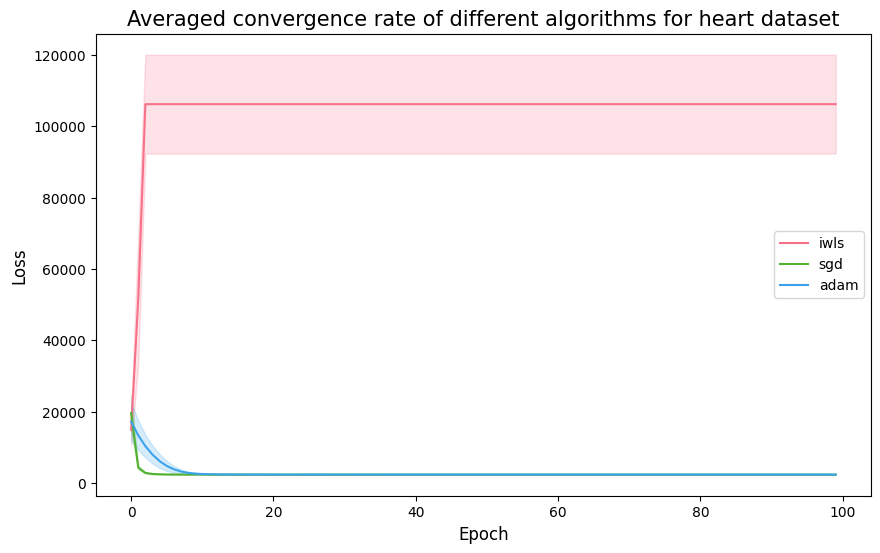

In [25]:
visualize_convergence(after_epoch, "heart", 100)

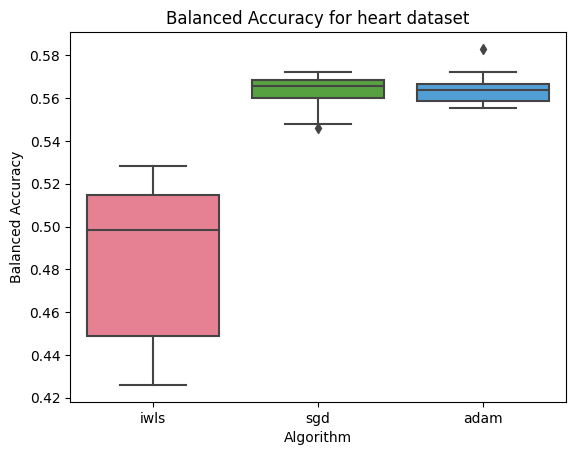

In [26]:
visualize_balanced_accuracy(metric, "heart")

# polish_companies_bankruptcy

In [27]:
X, y = process_df("polish_companies_bankruptcy")
after_epoch, metric = compare_convergence(X, y, k=10)

Downsampling polish_companies_bankruptcy to 12000 samples form 20280 samples
Time run our at epoch 1.
Run 1 of iwls completed
Time run our at epoch 0.
Run 2 of iwls completed
Time run our at epoch 1.
Run 3 of iwls completed
Time run our at epoch 1.
Run 4 of iwls completed
Time run our at epoch 1.
Run 5 of iwls completed
Time run our at epoch 1.
Run 6 of iwls completed
Time run our at epoch 1.
Run 7 of iwls completed
Time run our at epoch 1.
Run 8 of iwls completed
Time run our at epoch 1.
Run 9 of iwls completed
Time run our at epoch 1.
Run 10 of iwls completed
Early stopping criterion reached at epoch 30.
Run 1 of sgd completed
Early stopping criterion reached at epoch 81.
Run 2 of sgd completed
Early stopping criterion reached at epoch 49.
Run 3 of sgd completed
Early stopping criterion reached at epoch 51.
Run 4 of sgd completed
Early stopping criterion reached at epoch 64.
Run 5 of sgd completed
Early stopping criterion reached at epoch 42.
Run 6 of sgd completed
Early stopping cri

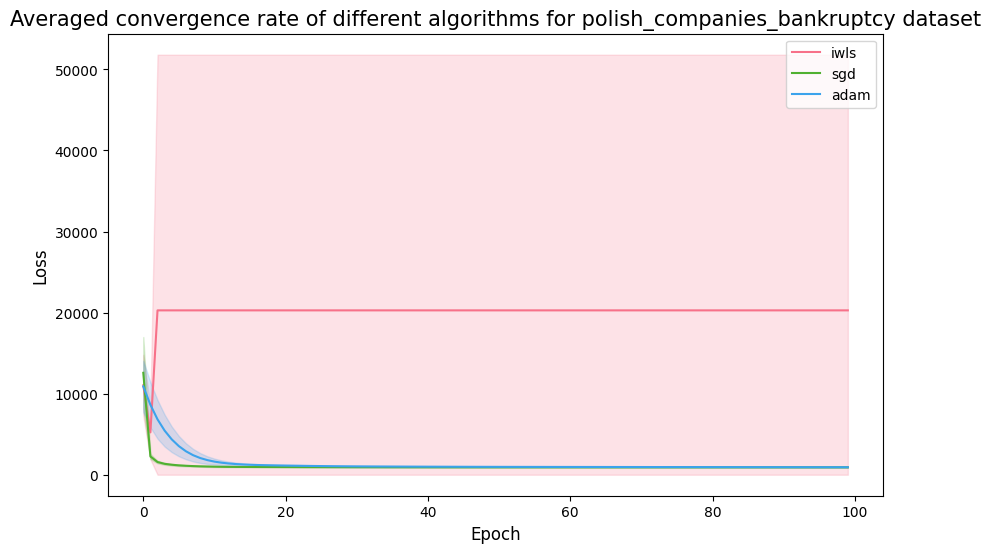

In [28]:
visualize_convergence(after_epoch, "polish_companies_bankruptcy", 100)

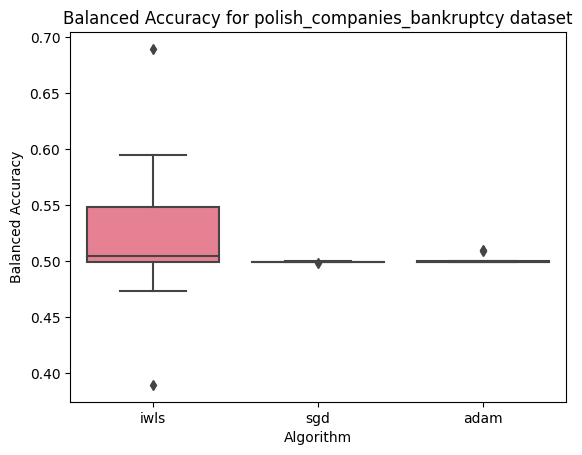

In [29]:
visualize_balanced_accuracy(metric, "polish_companies_bankruptcy")

# raisin

In [30]:
X, y = process_df("raisin")
after_epoch, metric = compare_convergence(X, y, k=10)

Run 1 of iwls completed
Run 2 of iwls completed
Run 3 of iwls completed
Run 4 of iwls completed
Run 5 of iwls completed
Run 6 of iwls completed
Run 7 of iwls completed
Run 8 of iwls completed
Run 9 of iwls completed
Run 10 of iwls completed
Early stopping criterion reached at epoch 199.
Run 1 of sgd completed
Early stopping criterion reached at epoch 217.
Run 2 of sgd completed
Early stopping criterion reached at epoch 197.
Run 3 of sgd completed
Early stopping criterion reached at epoch 153.
Run 4 of sgd completed
Early stopping criterion reached at epoch 211.
Run 5 of sgd completed
Early stopping criterion reached at epoch 180.
Run 6 of sgd completed
Early stopping criterion reached at epoch 190.
Run 7 of sgd completed
Early stopping criterion reached at epoch 203.
Run 8 of sgd completed
Early stopping criterion reached at epoch 207.
Run 9 of sgd completed
Early stopping criterion reached at epoch 181.
Run 10 of sgd completed
Run 1 of adam completed
Run 2 of adam completed
Run 3 of a

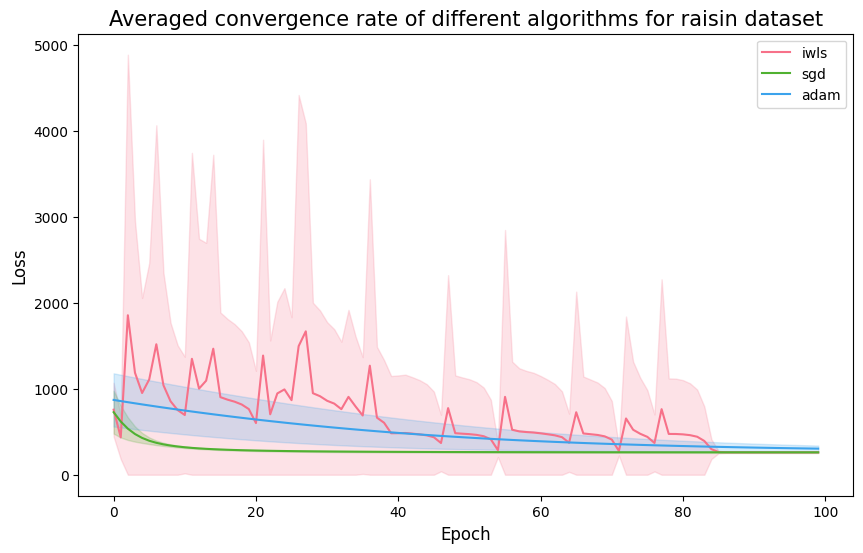

In [31]:
visualize_convergence(after_epoch, "raisin", 100)

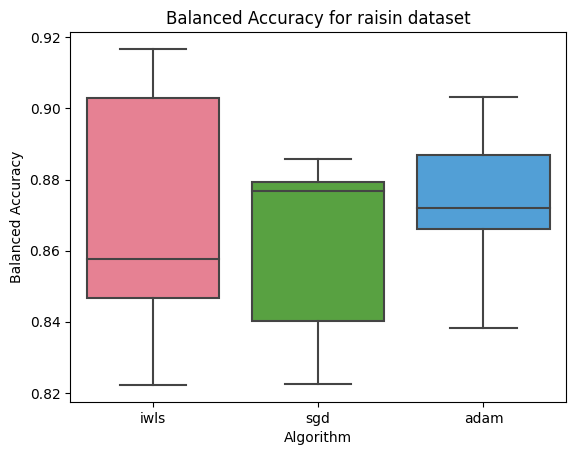

In [32]:
visualize_balanced_accuracy(metric, "raisin")

# rice

In [33]:
X, y = process_df("rice")
after_epoch, metric = compare_convergence(X, y, k=10)

Time run our at epoch 40.
Run 1 of iwls completed
Time run our at epoch 35.
Run 2 of iwls completed
Time run our at epoch 34.
Run 3 of iwls completed
Time run our at epoch 41.
Run 4 of iwls completed
Time run our at epoch 38.
Run 5 of iwls completed
Time run our at epoch 38.
Run 6 of iwls completed
Time run our at epoch 39.
Run 7 of iwls completed
Time run our at epoch 40.
Run 8 of iwls completed
Time run our at epoch 35.
Run 9 of iwls completed
Time run our at epoch 34.
Run 10 of iwls completed
Early stopping criterion reached at epoch 56.
Run 1 of sgd completed
Early stopping criterion reached at epoch 58.
Run 2 of sgd completed
Early stopping criterion reached at epoch 61.
Run 3 of sgd completed
Early stopping criterion reached at epoch 56.
Run 4 of sgd completed
Early stopping criterion reached at epoch 55.
Run 5 of sgd completed
Early stopping criterion reached at epoch 56.
Run 6 of sgd completed
Early stopping criterion reached at epoch 54.
Run 7 of sgd completed
Early stopping c

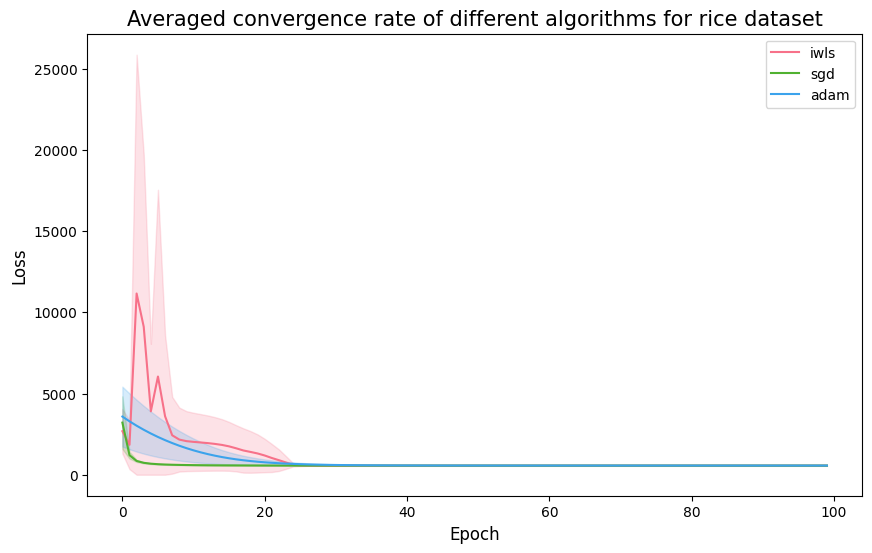

In [34]:
visualize_convergence(after_epoch, "rice", 100)

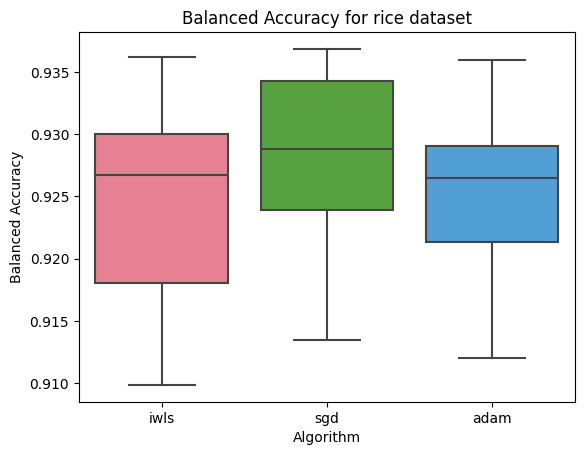

In [35]:
visualize_balanced_accuracy(metric, "rice")

# raisin plot of each run iwls

In [40]:
X, y = process_df("raisin")
after_epoch, metric = compare_convergence(X, y, k=10, algorithms=["iwls"])

Run 1 of iwls completed
Run 2 of iwls completed
Run 3 of iwls completed
Run 4 of iwls completed
Run 5 of iwls completed
Run 6 of iwls completed
Run 7 of iwls completed
Run 8 of iwls completed
Run 9 of iwls completed
Run 10 of iwls completed


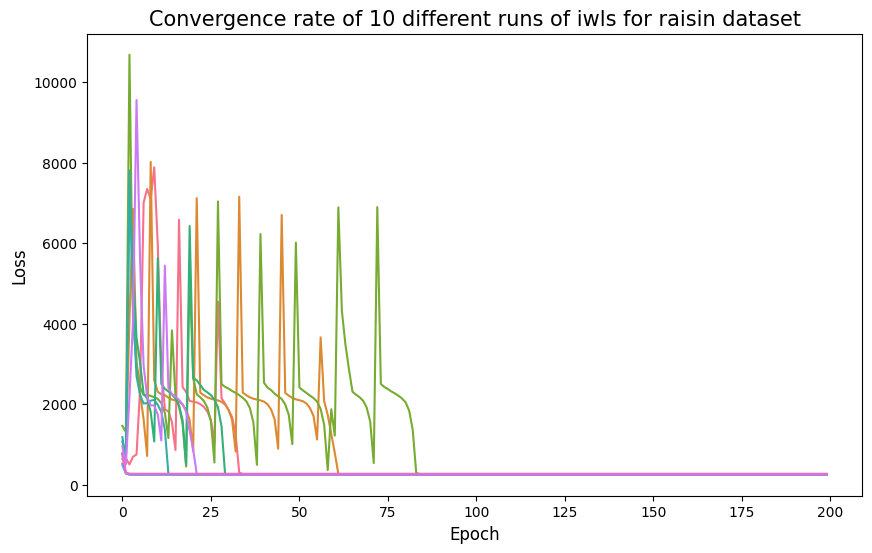

In [50]:
after_epoch_processed = defaultdict(list)
for alg_name, runs in after_epoch.items():
    for run in runs:
        zeros = np.zeros(501)
        for i in range(501):
            if i < len(run):
                zeros[i] = run[i]
            else:
                zeros[i] = run[-1]
        after_epoch_processed[alg_name].append(zeros)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", 10)
counter = 0
for alg_name, runs in after_epoch_processed.items():
    for run in runs:
        counter += 1
        plt.plot(run[:200], label=alg_name, color=colors[counter - 1])
plt.title(
    f"Convergence rate of 10 different runs of iwls for raisin dataset",
    fontsize=15,
)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.savefig(f"plots/convergence/raisin_iwls_rins.png")